# REDA1-CE1000: Introduction to Real Estate Data Analytics

## Week 6



### Characteristics of Time Series Data



### Common Economic Time Series: Time Series as Story Telling



### Seasonality and Detrending

### Introduction to Time Series Analysis

* A **time series** is simply the observation of a random variable, $y_t$, over a sample time frame, $t=1,...,T$.  



* Examples include interest rates, cap rates, and vacancy rates.  Time increments could be a month, a day, a second, or something smaller if one were dealing with high-frequency trading data.



* We propose that some **data genereating process** gave rise to the series that we observe.  Our goal is to the model a time series in order to learn about its characteristics, either for hypothesis testing or prediction.




### Characteristics of Time Series Data

1. **Trends**.  Are there consistent upward or downward patterns that could be modeled using statistical techniques?
2. **Serial dependence**.  Are there positive or negative correlations of time-adjacent observations?
3. **Stationarity**.  Would the series diverge to $\pm \infty$ in finite time? 



* Let's examine some time series data to discuss these key topics.  This is time series as story telling, the common method of **thought leadership** in CRE.

In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import fix_yahoo_finance
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

## An Interest Rate: The Price of Money

* When you bought your computer, you paid a price to the store and received your computer in exchange.
* Economists believe the prices are determined **in equilibrium** by something no one observes: **demand and supply curves**.
* An **interest rate** is simply the price of money. 
    * But there is no single interest rate.  
    * Macroeconomics thinks about $r^*$, a [natural or Wicksellian rate of interest](https://en.wikipedia.org/wiki/Natural_rate_of_interest), a rate of interest that would prevail in an environment of full employment and low inflation.
* We can display this in the typical demand-supply graph in economics.

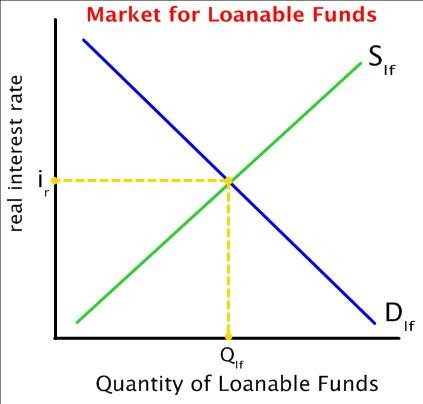

In [2]:
from IPython.display import Image
url = 'https://sbhshgovapmacro.files.wordpress.com/2011/04/loanable-funds-graph.jpg'
Image(url, width=400, height=400)

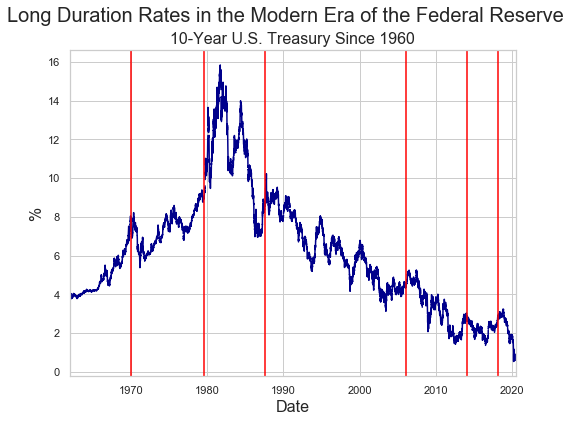

In [3]:
ten_year = fred.get_series("DGS10", observation_start='1960-01-01')
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates in the Modern Era of the Federal Reserve', fontsize=20)
plt.title('10-Year U.S. Treasury Since 1960', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(1970, 1, 30), color="red")
plt.axvline(dt.datetime(1979, 8, 6), color="red")
plt.axvline(dt.datetime(1987, 8, 11), color="red")
plt.axvline(dt.datetime(2006, 2, 1), color="red")
plt.axvline(dt.datetime(2014, 2, 3), color="red")
plt.axvline(dt.datetime(2018, 2, 5), color="red")

### Fed Chairpersons

* Pre-1970's: William Martin
* 1970: Arthur Burns, Ph.D.
* 1979: Paul Volcker
* 1987: Alan Greenspan, Ph.D.
* 2006: Ben Bernanke, Ph.D.
* 2014: Janet Yellin, Ph.D.
* 2018: Jay Powell

### Characteristics of Time Series Data

1. **Trends**.  Are there consistent upward or downward patterns?
2. **Serial dependence**.  Are there positive or negative correlations of time-adjacent observations?
3. **Stationarity**.  Would the series diverge to $\pm \infty$ in finite time? 

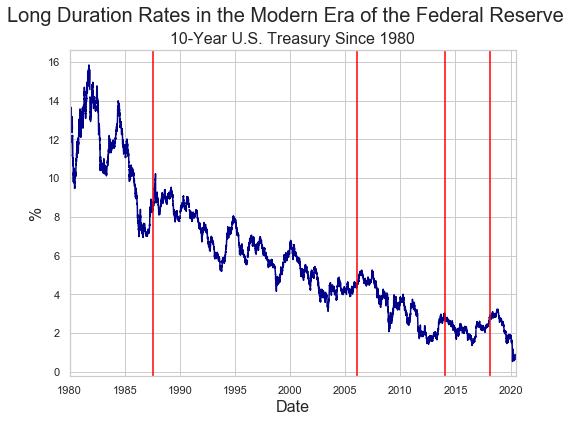

In [4]:
ten_year = fred.get_series("DGS10", observation_start='1980-01-01')
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates in the Modern Era of the Federal Reserve', fontsize=20)
plt.title('10-Year U.S. Treasury Since 1980', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(1970, 1, 30), color="red")
plt.axvline(dt.datetime(1979, 8, 6), color="red")
plt.axvline(dt.datetime(1987, 8, 11), color="red")
plt.axvline(dt.datetime(2006, 2, 1), color="red")
plt.axvline(dt.datetime(2014, 2, 3), color="red")
plt.axvline(dt.datetime(2018, 2, 5), color="red")

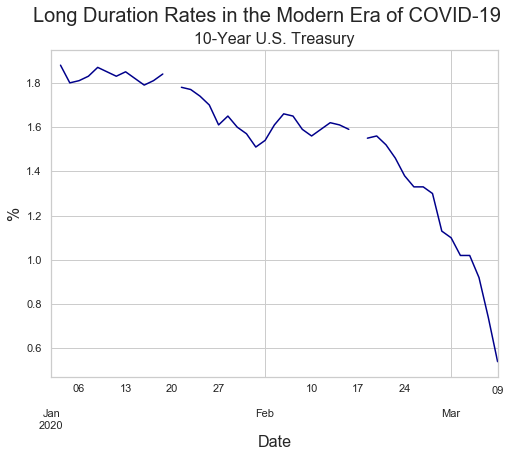

In [5]:
ten_year = fred.get_series("DGS10", observation_start='2020-01-01', observation_end='2020-3-9')
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates in the Modern Era of COVID-19', fontsize=20)
plt.title('10-Year U.S. Treasury', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(1970, 1, 30), color="red")
plt.axvline(dt.datetime(1979, 8, 6), color="red")
plt.axvline(dt.datetime(1987, 8, 11), color="red")
plt.axvline(dt.datetime(2006, 2, 1), color="red")
plt.axvline(dt.datetime(2014, 2, 3), color="red")
plt.axvline(dt.datetime(2018, 2, 5), color="red")

### Historical Development of Time Series Analysis
* Analytic tools heavily driven by economics and finance.
* Major innovations include autoregression, moving averages, and integrated processes (unit roots).
* Core ideal was to recognize that some underlying process was generating data that may have no causal interpretation.
* University of California at San Diego was ground-zero:
     * Robert Engle, Clive Granger, and Hal White.
    * James Hamilton’s *Time Series Analysis* remains the canonical reference.
* These techniques are very valuable in quantitative CRE because most of the data we encounter are time series.

### Topics Covered in Advanced Topics
* Markov chains
* Autoregressive models
* Moving average models
* ARIMA
* Hidden Markov models
* Many examples used throughout

## Common Economic Time Series: Time Series as Storytelling

## Isolating Cycles from Trends in Time Series Data

* Certain time series data have long-term trends and short-term cyclicality.  



* A typical example is seasonality: during particular periods of time *every* year, there is an increase in a time series that occurs on a regular cycle (such as, the sales of goods in the U.S. around the winter holidays).



* A popular algorithm to detrend data is the Hodrick-Prescott (HP) filter.  Basically, the filter disaggregates a time series, $y_t$, into its trend component and its cyclical component.  In some cases, our interest may lie in examining the trend rather than the noisy cycle.  



* Start with a time series, $y_t$, of size, $t=1,...,T$.  The Hodrick-Prescott filter disaggregates $y_t$ into a trend component, $\tau_t$, and a cyclical component, $\gamma_t$, such that $y_t = \tau_t + \gamma_t$.



* The components are determined by minimizing the following with respect to $\tau$: ${\displaystyle \sum_{t = 1}^T {(y_t - \tau _t )^2 }  + \lambda \sum_{t = 2}^{T - 1} {[(\tau_{t+1}  - \tau_t) - (\tau_t  - \tau_{t - 1} )]^2 }}$
    * The first term is the now-familiar squared error (or squared deviation), which measures deviations from the cyclical component, $\gamma_t$.  We seek to minimize this with respect to $\tau$, which is just our predictor.
    * The second term arises from the fact that this algorithm uses constrained optimization (minimization, in this case), where the constraint is captured in the term associated with $\lambda$.  
    * Basically, $(\tau_{t+1} - \tau_t)$ is the rate of change in the trend at $t+1$, while $(\tau_{t} - \tau_{t-1})$ is the rate of change in the trend at $t$.  The constraint imposed on the minimization problem penalizes large variations in the growth rates of the trend.



* Rule of thumb: $\lambda = 1600$ for quarterly data (which is considered a baseline).  In practice, we adjust $\lambda$ in the [following manner](http://discovery.ucl.ac.uk/18641/1/18641.pdf):
    * $\lambda = 6.25$ for annual data.
    * $\lambda = 129600$ for monthly data.
    * $\lambda = 104976000000$ for daily data.